In [ ]:
 from itertools import permutations
 
 # useful additional packages
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from qiskit import *
from qiskit import (Aer, ClassicalRegister, QuantumCircuit, QuantumRegister,
                 assemble, execute, transpile)
from qiskit.algorithms.minimum_eigensolvers import (QAOA,
                                                 NumPyMinimumEigensolver,
                                                 SamplingVQE)
from qiskit.algorithms.optimizers import COBYLA, SPSA
from qiskit.circuit.library import RealAmplitudes, TwoLocal
from qiskit.primitives import Sampler
from qiskit.quantum_info import Statevector
from qiskit.tools.visualization import plot_histogram
from qiskit.utils import algorithm_globals
from qiskit.visualization import (plot_bloch_multivector, plot_histogram,
                               plot_state_qsphere)
from qiskit_aer import Aer, AerSimulator
from qiskit_optimization.algorithms import (GroverOptimizer,
                                         MinimumEigenOptimizer,
                                         SlsqpOptimizer,
                                         WarmStartQAOAOptimizer)
from qiskit_optimization.applications import Maxcut, Tsp
from qiskit_optimization.converters import QuadraticProgramToQubo

sim = Aer.get_backend("aer_simulator")


## Q1 量子回路の作成・プロット
4個の量子ビットを持つ量子レジスタと4個の古典ビットを持つ古典レジスタから構成される量子回路を作成し、回路図をプロットせよ。ただし、量子レジスタの名前を`QR`、古典レジスタの名前を`CR`とすること。

### A1

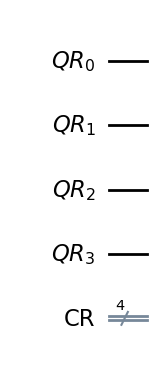

In [ ]:
qr = QuantumRegister(size=4, name="QR")
cr = ClassicalRegister(size=4, name="CR")
qc = QuantumCircuit(qr, cr)
qc.draw(output="mpl")

## Q2 測定
4個の量子ビットを持つ量子レジスタ`QR`の第0量子ビットを測定し、結果を4個古典ビットを持つ古典レジスタ`CR`の第0古典ビットに格納する量子回路を作成せよ。また、作成した量子回路の回路図をプロットせよ。

### A2

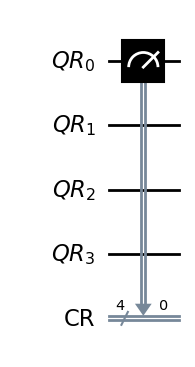

In [ ]:
qr = QuantumRegister(size=4, name="QR")
cr = ClassicalRegister(size=4, name="CR")
qc = QuantumCircuit(qr, cr)
qc.measure(qr[0], cr[0])
qc.draw(output="mpl")

## Q3 状態ベクトルから確率算出
下記の量子回路において、量子ビットを測定した結果として$|0\rangle$が得られる確率を、状態ベクトルから算出せよ。

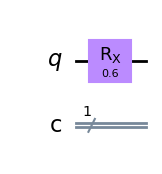

In [ ]:
qc = QuantumCircuit(1, 1)
qc.rx(theta=0.6, qubit=0)
qc.draw(output="mpl")

### A3

In [ ]:
state_vector = Statevector.from_instruction(qc)
print("prob. of |0> = ", np.abs(state_vector[0])**2)

prob. of |0> =  0.9126678074548391


## Q4 $|0\rangle$状態が得られる確率
Q3の量子回路において、量子ビットを測定した結果として$|0\rangle$が得られる確率を、量子ビットを測定する量子回路を作成し、シミュレーターを用いて確率を算出せよ。

### A4

In [ ]:
qc = QuantumCircuit(1, 1)
qc.rx(theta=0.6, qubit=0)
qc.measure(0, 0)
shots = 10000
counts = execute(qc, sim, shots=shots).result().get_counts()
print("prob. of |0> = ", counts["0"]/shots)

prob. of |0> =  0.9083


## Q5 2量子ビット回路の作成
 2量子ビットの回路を作成し、両方の量子ビットを|0⟩状態から|1⟩状態に変更せよ。

### A5

{'11': 1024}


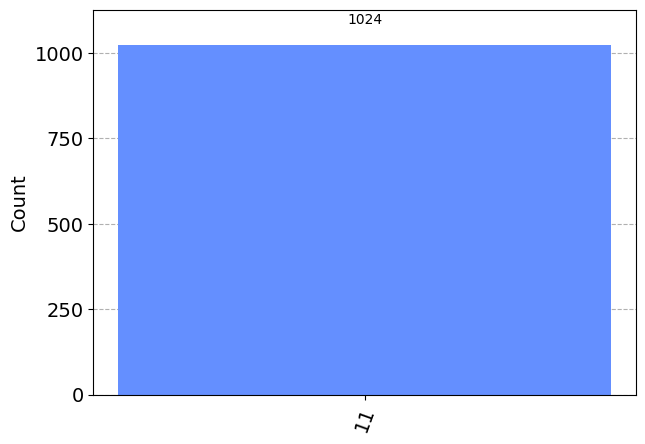

In [ ]:
from qiskit import QuantumCircuit, Aer, execute

# 2量子ビット回路を作成
qc = QuantumCircuit(2)

# Xゲートを利用し、両方の量子ビットを|1⟩状態に変更
qc.x(0)
qc.x(1)

# 回路の状態を測定
qc.measure_all()

# シミュレータで実行
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, simulator).result()
counts = result.get_counts()
print(counts)
# ヒストグラムで結果を可視化します
plot_histogram(counts)

## Q6 アダマールゲート(1)
1量子ビットを用意し、アダマールゲートを適用して量子状態を求めるプログラムを作成せよ。また、測定操作を行った際の確率分布を出力せよ。

### A6

{'0': 521, '1': 503}


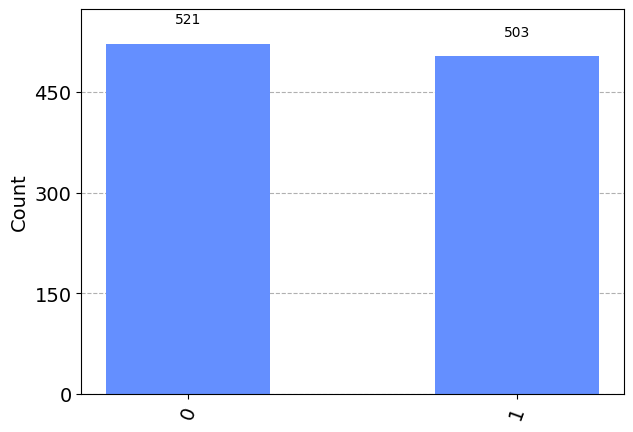

In [ ]:
# 量子回路を作成
qc = QuantumCircuit(1, 1)  # 1量子ビットと1古典ビットを持つ回路

# アダマールゲートを適用
qc.h(0)  # 1番目の量子ビットにアダマールゲートを適用

# 測定操作を追加
qc.measure(0, 0)  # 1番目の量子ビットを測定し、結果を1番目の古典ビットに格納

# バックエンドを選択してシミュレーション実行
simulator = Aer.get_backend('aer_simulator')
compiled_circuit = transpile(qc, simulator)
result = simulator.run(compiled_circuit).result()

# 確率分布を出力
counts = result.get_counts()
print(counts)

# 確率分布をヒストグラムとして表示
plot_histogram(counts)

このプログラムでは、1量子ビットの量子回路を作成し、アダマールゲートを適用して量子状態を求め、測定操作を行った際の確率分布を出力します。

## Q7 アダマールゲート(2)
2量子ビットの回路を作成し、アダマールゲートを使用して2つの量子ビットを重ね合わせ状態にせよ。

### A7

{'01': 272, '11': 269, '00': 239, '10': 244}


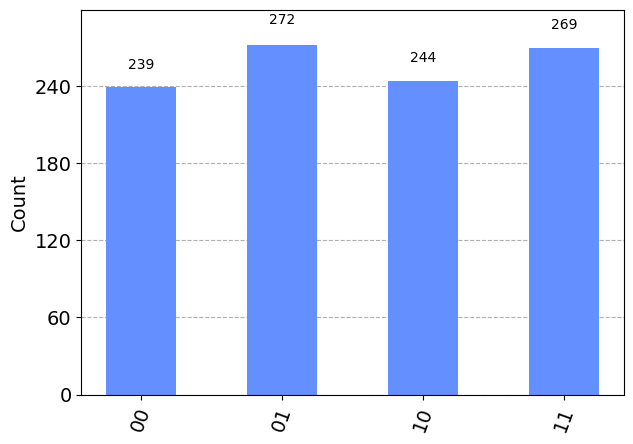

In [ ]:

# 2量子ビット回路を作成
qc = QuantumCircuit(2)

# Hadamardゲートを両方の量子ビットに適用
qc.h(0)
qc.h(1)

# 回路の状態を測定
qc.measure_all()

# シミュレータで実行
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, simulator).result()
counts = result.get_counts()
print(counts)

# ヒストグラムで結果を可視化します
plot_histogram(counts)

## Q8 アダマールゲート(3)
3つの量子ビットを持つ回路を作成し、重ね合わせ状態を作れ。具体的には、初期量子ビットが|0>の状態で、各ビットが重ね合わせ状態$(|0\rangle> + |1\rangle>) / \sqrt(2)$になるせよ。

### A8

Statevector([0.35355339+0.j, 0.35355339+0.j, 0.35355339+0.j,
             0.35355339+0.j, 0.35355339+0.j, 0.35355339+0.j,
             0.35355339+0.j, 0.35355339+0.j],
            dims=(2, 2, 2))


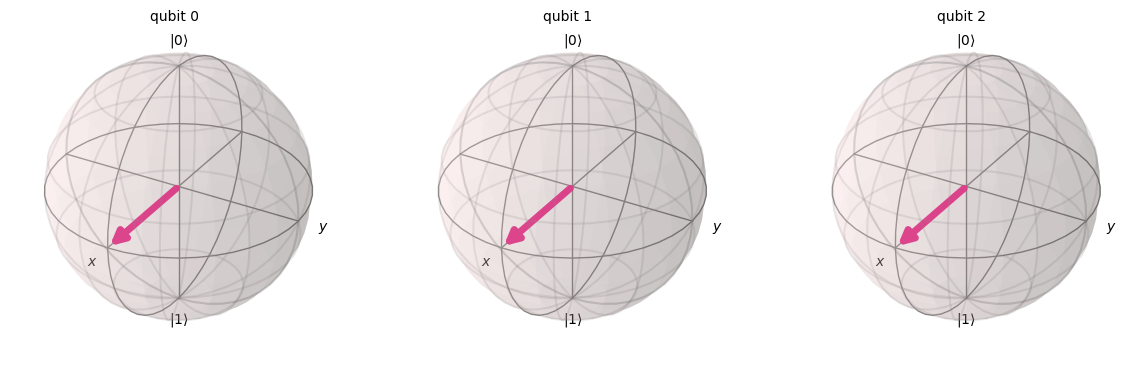

In [ ]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_bloch_multivector

# 3つの量子ビットを持つ回路を作成
qc = QuantumCircuit(3)

# 最初のビットにHadamardゲートを適用
qc.h(0)

# 次の2つのビットにHadamardゲートを適用して重ね合わせ状態を作る
qc.h(1)
qc.h(2)

# 結果を確認
backend = Aer.get_backend('statevector_simulator')
job = execute(qc, backend)
statevector = job.result().get_statevector(qc)
print(statevector)

# ブロッホ球で結果を可視化c
plot_bloch_multivector(statevector)


## Q9 CNOTゲート
2量子ビットの回路を作成し、CNOTゲートを使用して1つの量子ビットの状態でもう一方の量子ビットを反転させなさい。

### A9

{'11': 1024}


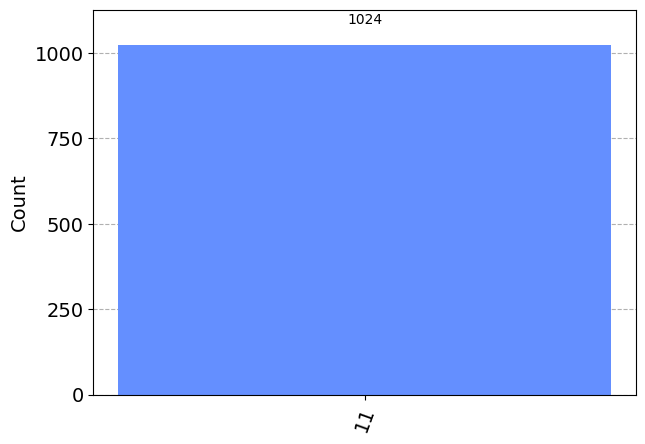

In [ ]:
from qiskit import QuantumCircuit, Aer, execute

# 2量子ビット回路を作成（両方の量子ビットは0ケット）
qc = QuantumCircuit(2)
qc.x(0) # 1番目のビットを1ケットにする

# CNOTゲートを適用することで1番目の量子ビットが1のときのみ2番目の量子ビットを反転する
qc.cx(0, 1)

# 回路の状態を測定
qc.measure_all()
qc.draw(initial_state=True)

# シミュレータで実行
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, simulator).result()
counts = result.get_counts()
print(counts)

# ヒストグラムで結果を可視化します
plot_histogram(counts)

## Q10 期待値計算(1)
下記の量子回路で表される状態ベクトルにおけるパウリ行列`X`の期待値を計算する量子回路を作成せよ。また、作成した量子回路の回路図をプロットせよ。

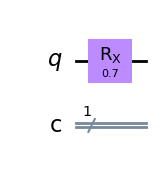

In [ ]:
qc = QuantumCircuit(1, 1)
qc.rx(theta=0.7, qubit=0)
qc.draw(output="mpl")

### A10

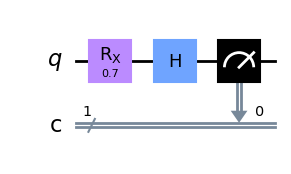

In [ ]:
qc.h(0)
qc.measure(0, 0)
qc.draw(output="mpl")

## Q11 期待値計算(2)
Q5に作成した量子回路を用いて、パウリ行列`X`の期待値をシミュレーターを用いて計算せよ。

### A11

In [ ]:
qc = QuantumCircuit(1, 1)
qc.rx(theta=0.7, qubit=0)
qc.h(0)
qc.measure(0, 0)
shots = 10000
counts = execute(qc, sim, shots=shots).result().get_counts()
print("Xの期待値 = ", (counts["0"]-counts["1"]) / shots)

Xの期待値 =  -0.0014


## Q12 期待値計算(3)

任意の量子ビット状態$|q\rangle$ (計算基底)に対するパウリ演算子の期待値を表せ。例としてパウリZゲートの期待値の場合を示す。

$$
\begin{align}
\langle Z \rangle &=\langle q | Z | q\rangle =\langle q|0\rangle\langle 0|q\rangle - \langle q|1\rangle\langle 1|q\rangle
=|\langle 0 |q\rangle|^2 - |\langle 1 | q\rangle|^2 \tag{1}
\end{align}
$$



$$
\begin{align}
    \langle X \rangle &= \tag{2} \\
    \langle Y \rangle &=  \tag{3} 
\end{align}
$$

#### 出典
https://github.com/qiskit-community/qiskit-textbook/blob/master-ja/content/ch-labs/Lab02_QuantumMeasurement.ipynb

### A12



$$
\begin{align}
    \langle X \rangle =\langle q | X | q\rangle &=\langle q|0\rangle\langle 1|q\rangle + \langle q|1\rangle\langle 0|q\rangle
&= 2 Re (\langle q|0\rangle\langle 1|q\rangle )  \tag{2} \\
   \langle Y \rangle = \langle q | Y | q\rangle &= -i \langle q|0\rangle\langle 1|q\rangle + i \langle q|1\rangle\langle 0|q\rangle
&= 2 Im (\langle q|0\rangle\langle 1|q\rangle )  \tag{3}
\end{align}
$$

このように、量子ビット状態$|qrangle$に対するパウリの期待値は、標準基底フレームを対応する軸に沿うように回転させた後、標準基底で測定を行うことで得られる。上の式が示すように、2つの可能な結果0と1を得る確率を用いて、目的の期待値を評価する。
( [参照](https://qiskit.org/textbook/ch-states/single-qubit-gates.html)) 

## Q13　トフォリゲート (1)

3つの量子ビットを持つ回路を作成し、トフォリゲート（CCXゲート）を使用して、最初の2つのビットが1のときのみ、次のビットにXゲートを適用するようにせよ。

### A13

In [ ]:
# 3つの量子ビットを持つ回路を作成
qc = QuantumCircuit(3)

# ビットが1のときのみ次のビットにXゲートを適用する
qc.ccx(0, 1, 2)

# 結果を確認
backend = Aer.get_backend('statevector_simulator')
job = execute(qc, backend)
statevector = job.result().get_statevector(qc)
print(statevector)

# ブロッホ球で結果を可視化
plot_bloch_multivector(statevector)

## Q14 トフォリゲート(2)
3量子ビットの回路を作成し、Toffoliゲートと同じ効果を持つゲートを作成し、回路図を描画せよ。

### A14

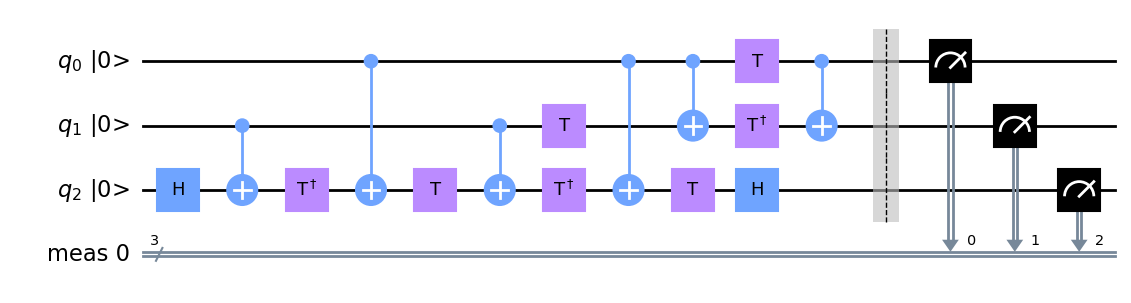

In [ ]:
def custom_toffoli(qc, control1, control2, target):
    """トフォリゲートと同じ効果を持つカスタムゲートの関数
    2角制御ビットの両方が1ケットの場合のみ標的ビットを反転する

    Args:
        qc (QuantumCircuit): 量子回路
        control1 (int): 1番目の制御ビットのインデックス
        control2 (int): 2番目の制御ビットのインデックス
        target (int): 1番目の標的ビットのインデックス
    """
    qc.h(target)
    qc.cx(control2, target)
    qc.tdg(target)
    qc.cx(control1, target)
    qc.t(target)
    qc.cx(control2, target)
    qc.tdg(target)
    qc.cx(control1, target)
    qc.t(control2)
    qc.t(target)
    qc.h(target)
    qc.cx(control1, control2)
    qc.t(control1)
    qc.tdg(control2)
    qc.cx(control1, control2)

# 3つの量子ビットを持つ量子回路を作成します
qc = QuantumCircuit(3)

# トフォリゲートと同じ効果を持つ自作のゲートを使用します
# 1番目、2番目の量子ビットが1ケットの場合のみ、3番目の量子ビットを反転させる
custom_toffoli(qc, 0, 1, 2)

# 回路の状態を測定
qc.measure_all()
qc.draw(initial_state=True,output="mpl")

## Q15 トフォリゲート(3)
Q14で作成した回路のシミュレーション結果を描画せよ。

### A15

Measurement results: {'000': 1024}


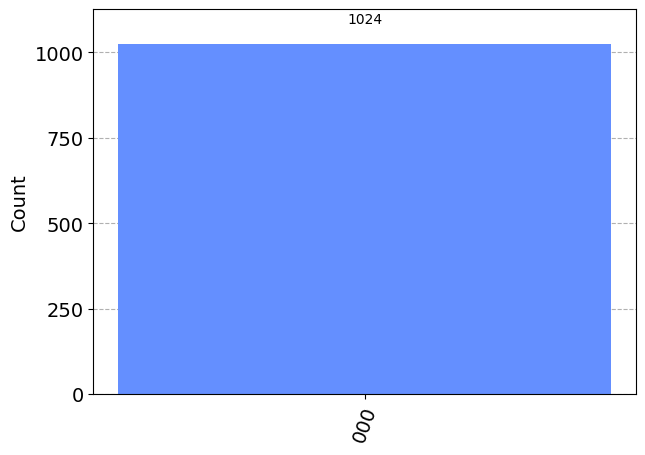

In [ ]:
# 回路をシミュレーションして結果を得ます
backend = AerSimulator()
compiled_circuit = transpile(qc, backend)
result = backend.run(compiled_circuit).result()

# 結果を表示します
counts = result.get_counts()
print("Measurement results:", counts)

# ヒストグラムで結果を可視化します
plot_histogram(counts)

## Q16 トフォリゲート(4)
Q15で作成したゲートがトフォリゲートと同じ結果になるか確認しなさい。

### A16

In [ ]:
from qiskit.quantum_info import state_fidelity

def reverse_bit(qubit, first_bit: int, second_bit: int):
    """Xゲートを利用して、1番目、2番目の量子ビットを引数で与えられた通りに反転させる

    Args:
        qubit (QuantumCircuit): 量子回路
        first_bit (int): 1番目の量子ビットのベクトルの向き（0ケットまたは1ケット）
        second_bit (int): 2番目の量子ビットのベクトルの向き（0ケットまたは1ケット）
    """
    if first_bit == 1:
        qubit.x(0)
    if second_bit == 1:
        qubit.x(1)

pattern_list = ["default_toffoli", "custom_toffoli"]

first_bit_second_bit_pattern = [(0, 0), (0, 1), (1, 0), (1, 1)]

default_toffoli_result_list = []
custom_toffoli_result_list = []

for i in range(len(pattern_list)):
    for first_bit, second_bit in first_bit_second_bit_pattern:
        
        qc = QuantumCircuit(3)
        reverse_bit(qc, first_bit, second_bit)
        if i == 0:
            # 標準のTofolliゲートを通す
            qc.toffoli(0, 1, 2)
        else:
            # カスタムのTofolliゲートを通す
            custom_toffoli(qc, 0, 1, 2)

        qc.measure_all()# 回路の状態を測定

        # シミュレータで実行
        simulator = Aer.get_backend('qasm_simulator')
        result = execute(qc, simulator).result()
        counts = result.get_counts()
        # シミュレーション結果を標準・カスタムそれぞれで格納
        if i == 0:
            default_toffoli_result_list.append(counts)
        else:
            custom_toffoli_result_list.append(counts)

print(f"標準のトフォリゲートでの結果: {default_toffoli_result_list}")
print(f"作成したトフォリゲートでの結果: {custom_toffoli_result_list}")
print(f"同じ結果かどうか: {default_toffoli_result_list == custom_toffoli_result_list}")

標準のトフォリゲートでの結果: [{'000': 1024}, {'010': 1024}, {'001': 1024}, {'111': 1024}]
作成したトフォリゲートでの結果: [{'000': 1024}, {'010': 1024}, {'001': 1024}, {'111': 1024}]
同じ結果かどうか: True


## Q17 エンタングルメント

2量子ビットのエンタングルメントを作成せよ。

### A17

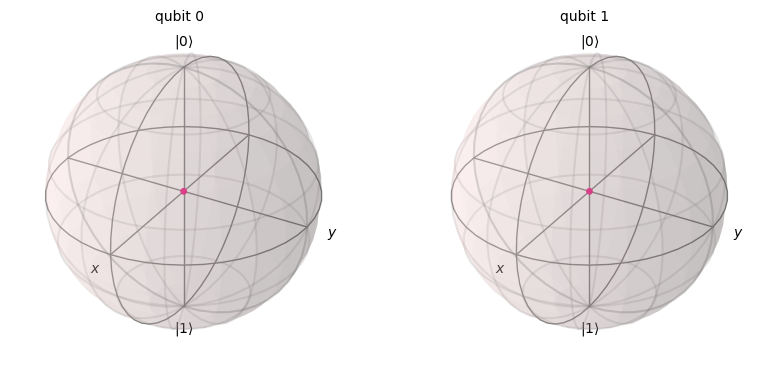

In [ ]:
from qiskit import QuantumCircuit, transpile, assemble, Aer, execute
from qiskit.visualization import plot_bloch_multivector

# 2つの量子ビットの回路の作成
circ = QuantumCircuit(2, 2)
circ.h(0)
circ.cx(0, 1)

# 回路の可視化
circ.draw(output='mpl')

# シミュレーション実行
simulator = Aer.get_backend('statevector_simulator')
job = execute(circ, simulator)
result = job.result()
statevector = result.get_statevector()

# ブロッホ球による可視化
plot_bloch_multivector(statevector)


## Q18 Bell状態 (1)
Bell状態を作成し、ヒストグラムで表示せよ。

### A18

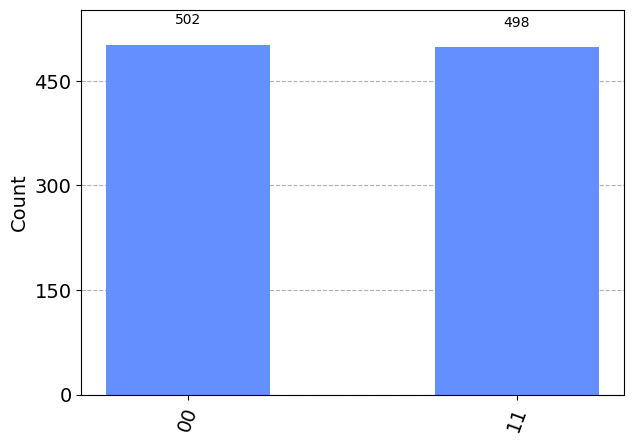

In [ ]:
# quantum circuit to make a Bell state
bell = QuantumCircuit(2, 2)
bell.h(0)
bell.cx(0, 1)

meas = QuantumCircuit(2, 2)
meas.measure([0,1], [0,1])

# execute the quantum circuit
backend = BasicAer.get_backend('qasm_simulator') # the device to run on
circ = bell.compose(meas)
result = backend.run(transpile(circ, backend), shots=1000).result()
counts  = result.get_counts(circ)
plot_histogram(counts)

#### 出典
以下からコードを取得：https://qiskit.org/documentation/locale/ja_JP/tutorials/circuits/2_plotting_data_in_qiskit.html

## Q19 Bell状態(2)

$\frac{1}{2}(|01\rangle + |10\rangle)$ のBell状態を作成し、ブロッホ球で表示せよ。

### A19

Statevector([0.        +0.j, 0.70710678+0.j, 0.70710678+0.j,
             0.        +0.j],
            dims=(2, 2))


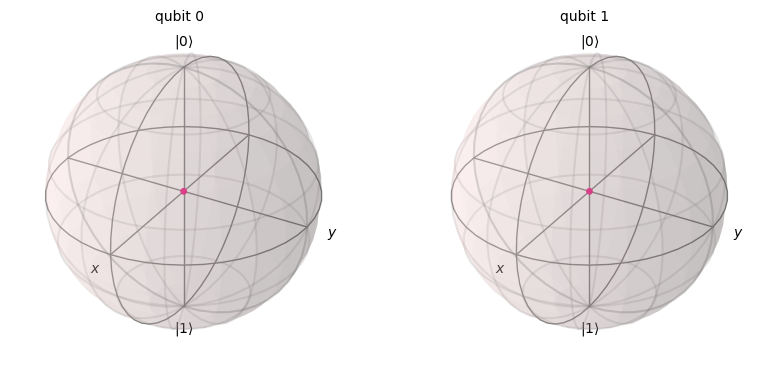

In [ ]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_bloch_multivector

# 2つの量子ビットを持つ回路を作成
qc = QuantumCircuit(2)

# 最初の量子ビットにHadamardゲートを適用
qc.h(0)

# CXゲートを適用して最初のビットが0または1の状態で次のビットが0の状態になるようにする
qc.cx(0, 1)

# |00>+|11>を|01>+|10>に
qc.x(0)

# 結果を確認
backend = Aer.get_backend('statevector_simulator')
job = execute(qc, backend)
statevector = job.result().get_statevector(qc)
print(statevector)

# ブロッホ球で結果を可視化
plot_bloch_multivector(statevector)


## Q20 Bell状態(3)

$\frac{1}{2}(|01\rangle - |10\rangle)$ のBell状態を作成し、ヒストグラムで表示せよ。

### A20

{'01': 531, '10': 493}


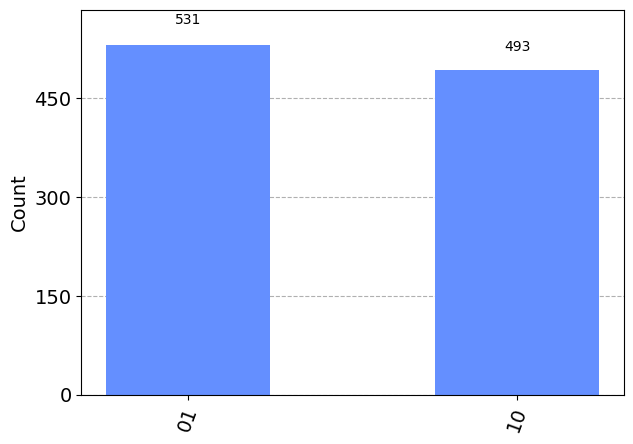

In [ ]:
# 量子回路を作成
qc = QuantumCircuit(2, 2)  # 2量子ビットと2古典ビットを持つ回路

## ベル状態を作成
# 最初の量子ビットにHadamardゲートを適用
qc.h(0)

# CXゲートを適用して最初のビットが0または1の状態で次のビットが0の状態になるようにする
qc.cx(0, 1)

# |00>+|11>を|01>+|10>に
qc.x(0)

# |01>+|10>を|01>-|10>に
qc.z(0)
# 測定操作を追加
qc.measure([0, 1], [0, 1])  # 両量子ビットを測定し、結果を2つの古典ビットに格納

# バックエンドを選択してシミュレーション実行
simulator = Aer.get_backend('aer_simulator')
compiled_circuit = transpile(qc, simulator)
result = simulator.run(compiled_circuit).result()

# 確率分布を出力
counts = result.get_counts()
print(counts)

# 確率分布をヒストグラムとして表示
plot_histogram(counts)

このプログラムでは、2量子ビットの量子回路を作成し、ベル状態を作成してからCNOTゲートを使用して量子エンタングルメントを実現します。最後に、測定操作を行って各量子ビットの測定結果を出力し、確率分布を表示します。

## Q21 Bell状態(4)

2つの量子ビットを持つ回路を作成し、1つ目のビットを|->状態にし、2つ目のビットを|1>状態にし、その後にCNOTゲートを適用し最終的な状態ベクトルを求めよ。

### A21

Statevector([ 0.        +0.00000000e+00j, -0.70710678-8.65956056e-17j,
              0.70710678+0.00000000e+00j,  0.        +0.00000000e+00j],
            dims=(2, 2))


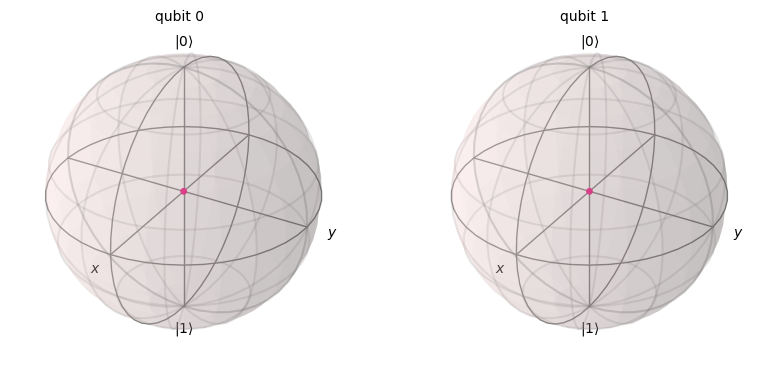

In [ ]:

# 2つの量子ビットを持つ回路を作成
qc = QuantumCircuit(2)

# 1つ目のビットを|->状態にする
qc.x(0)
qc.h(0)

# 2つ目のビットを|1>状態にする
qc.x(1)

# CNOTゲートを適用する
qc.cx(0, 1)

# 結果を確認
backend = Aer.get_backend('statevector_simulator')
job = execute(qc, backend)
statevector = job.result().get_statevector(qc)
print(statevector)

# ブロッホ球で結果を可視化
plot_bloch_multivector(statevector)


## Q22 GHZ状態 (1)
GHZ状態（Bell状態の3量子ビットへ拡張）を作成し、ヒストグラムで表示せよ。

### A22

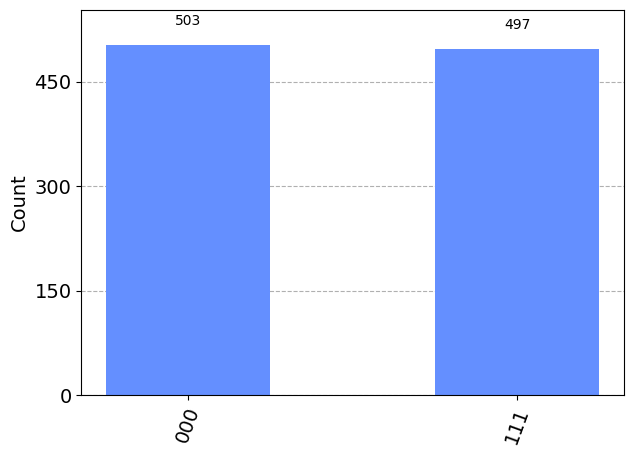

In [ ]:
# quantum circuit to make a GHZ state
ghz = QuantumCircuit(3, 3)
ghz.h(0)
ghz.cx(0, 1)
ghz.cx(0, 2)

meas = QuantumCircuit(3, 3)
meas.measure([0,1,2], [0,1,2])

# execute the quantum circuit
backend = BasicAer.get_backend('qasm_simulator') # the device to run on
circ = ghz.compose(meas)
result = backend.run(transpile(circ, backend), shots=1000).result()
counts  = result.get_counts(circ)
plot_histogram(counts)

#### 出典
Bell状態を修正して作成。作成時に以下を参照：https://qiskit.org/documentation/locale/ja_JP/tutorials/circuits/1_getting_started_with_qiskit.html

## Q23 GHZ状態(2)

3つの量子ビットを持つ回路を作成し、以下の操作を行え。
最初のビットにアダマールゲートを適用する。
次の2つのビットには、制御ゲートを使って最初のビットが|0>のときのみXゲートを適用する。
最終的な状態ベクトルを求めよ。

### A23

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.70710678+0.j],
            dims=(2, 2, 2))


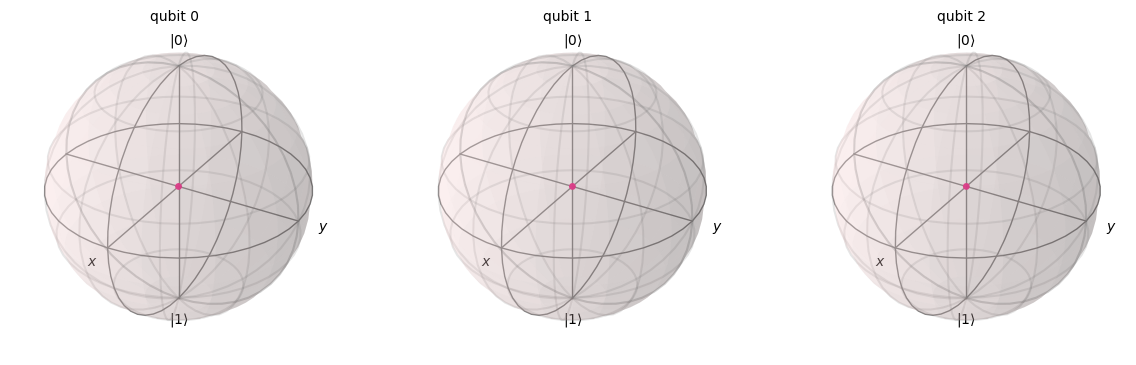

In [ ]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_bloch_multivector

# 3つの量子ビットを持つ回路を作成
qc = QuantumCircuit(3)

# 最初のビットにHadamardゲートを適用
qc.h(0)

# 次の2つのビットに制御Xゲートを適用
qc.x(0)
qc.cx(0, 1)
qc.cx(0, 2)
qc.x(0)

# 結果を確認
backend = Aer.get_backend('statevector_simulator')
job = execute(qc, backend)
statevector = job.result().get_statevector(qc)
print(statevector)

# ブロッホ球で結果を可視化
plot_bloch_multivector(statevector)


## Q24 GHZ状態(3)
n量子GHZ状態を作成せよ。

### A24

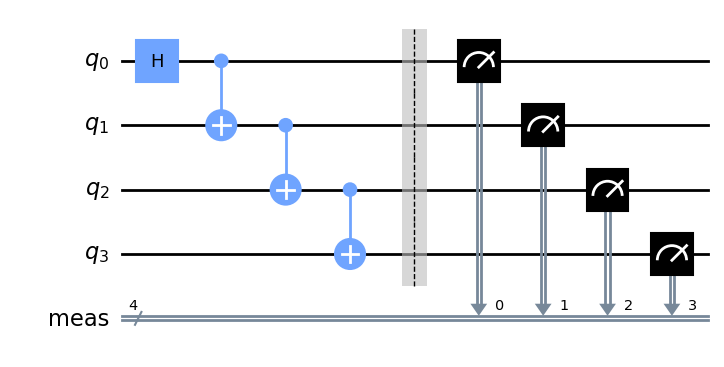

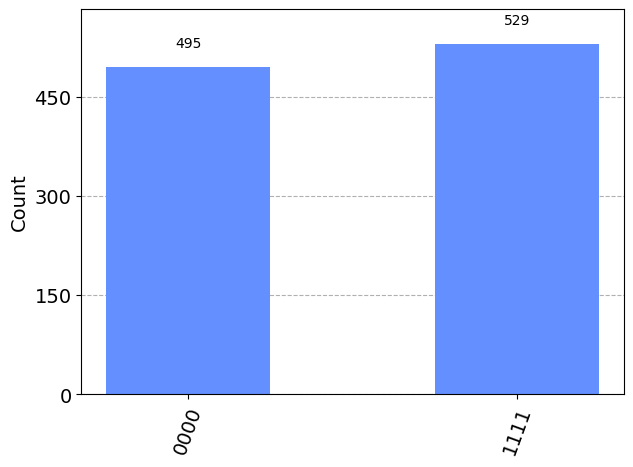

In [ ]:
# Import from Qiskit Aer noise module
from qiskit_aer.noise import (NoiseModel, QuantumError, ReadoutError,
    pauli_error, depolarizing_error, thermal_relaxation_error)

# System Specification
n_qubits = 4
circ = QuantumCircuit(n_qubits)

# Test Circuit
circ.h(0)
for qubit in range(n_qubits - 1):
    circ.cx(qubit, qubit + 1)
circ.measure_all()
display(circ.draw("mpl"))

# Ideal simulator and execution
sim_ideal = AerSimulator()
result_ideal = sim_ideal.run(circ).result()
plot_histogram(result_ideal.get_counts(0))

#### 出典
以下からコードを取得：https://qiskit.org/documentation/locale/ja_JP/tutorials/simulators/3_building_noise_models.html

## Q25 古典論理ゲート再現(1)

Qiskitのxで表されるNOTゲート、cxで表されるCNOTゲート、およびccxで表されるToffoliゲートを使用して、XORを作成せよ。

In [ ]:
def XOR(input1,input2):
    
    q = QuantumRegister(2) # two qubits in which to encode and manipulate the input
    c = ClassicalRegister(1) # a bit to store the output
    qc = QuantumCircuit(q, c) # this is where the quantum program goes
    
    # YOUR QUANTUM PROGRAM GOES HERE    
    qc.measure(q[1],c[0]) # YOU CAN CHANGE THIS IF YOU WANT TO
    
    # We'll run the program on a simulator
    backend = Aer.get_backend('aer_simulator')
    # Since the output will be deterministic, we can use just a single shot to get it
    job = execute(qc,backend,shots=1,memory=True)
    output = job.result().get_memory()[0]
    
    return output

### A25

In [ ]:
def XOR(input1, input2):

    q = QuantumRegister(2)  # two qubits in which to encode and manipulate the input
    c = ClassicalRegister(1)  # a bit to store the output
    qc = QuantumCircuit(q, c)  # this is where the quantum program goes

    # YOUR QUANTUM PROGRAM GOES HERE   
    if input1 == 1:
        qc.x(0)
    if input2 == 1:
        qc.x(1)
    qc.cx(0, 1)
    qc.measure(q[1], c[0])  # YOU CAN CHANGE THIS IF YOU WANT TO

    # We'll run the program on a simulator
    backend = Aer.get_backend("aer_simulator")
    # Since the output will be deterministic, we can use just a single shot to get it
    job = execute(qc, backend, shots=1, memory=True)
    output = job.result().get_memory()[0]

    return output


for i, j in [(0, 0), (0, 1), (1, 0), (1, 1)]:
    print(f"XOR{i,j} → {XOR(i,j)}")

XOR(0, 0) → 0
XOR(0, 1) → 1
XOR(1, 0) → 1
XOR(1, 1) → 0


#### 出典
https://github.com/qiskit-community/qiskit-textbook/blob/master-ja/content/ch-ex/ex1.ipynb

## Q26 古典論理ゲート再現(2)

Qiskitのxで表されるNOTゲート、cxで表されるCNOTゲート、およびccxで表されるToffoliゲートを使用して、ANDを作成せよ。

In [ ]:
def AND(input1,input2):
    
    q = QuantumRegister(3) # two qubits in which to encode the input, and one for the output
    c = ClassicalRegister(1) # a bit to store the output
    qc = QuantumCircuit(q, c) # this is where the quantum program goes
    
    # YOUR QUANTUM PROGRAM GOES HERE
    qc.measure(q[2],c[0]) # YOU CAN CHANGE THIS IF YOU WANT TO
    
    # We'll run the program on a simulator
    backend = Aer.get_backend('aer_simulator')
    # Since the output will be deterministic, we can use just a single shot to get it
    job = execute(qc,backend,shots=1,memory=True)
    output = job.result().get_memory()[0]
    
    return output

### A26

In [ ]:
def AND(input1,input2):
    
    q = QuantumRegister(3) # two qubits in which to encode the input, and one for the output
    c = ClassicalRegister(1) # a bit to store the output
    qc = QuantumCircuit(q, c) # this is where the quantum program goes
    
    # YOUR QUANTUM PROGRAM GOES HERE
    if input1 == 1:
        qc.x(0)
    if input2 == 1:
        qc.x(1)
    qc.ccx(0,1,2)
    qc.measure(q[2],c[0]) # YOU CAN CHANGE THIS IF YOU WANT TO
    
    # We'll run the program on a simulator
    backend = Aer.get_backend('aer_simulator')
    # Since the output will be deterministic, we can use just a single shot to get it
    job = execute(qc,backend,shots=1,memory=True)
    output = job.result().get_memory()[0]
    
    return output

for i, j in [(0, 0), (0, 1), (1, 0), (1, 1)]:
    print(f"AND{i,j} → {AND(i,j)}")

AND(0, 0) → 0
AND(0, 1) → 0
AND(1, 0) → 0
AND(1, 1) → 1


#### 出典
https://github.com/qiskit-community/qiskit-textbook/blob/master-ja/content/ch-ex/ex1.ipynb

## Q27 古典論理ゲート再現(3)

Qiskitのxで表されるNOTゲート、cxで表されるCNOTゲート、およびccxで表されるToffoliゲートを使用して、NANDを作成せよ。

In [ ]:
def NAND(input1,input2):
  
    q = QuantumRegister(3) # two qubits in which to encode the input, and one for the output
    c = ClassicalRegister(1) # a bit to store the output
    qc = QuantumCircuit(q, c) # this is where the quantum program goes
    
    # YOUR QUANTUM PROGRAM GOES HERE
    qc.measure(q[2],c[0]) # YOU CAN CHANGE THIS IF YOU WANT TO
    
    # We'll run the program on a simulator
    backend = Aer.get_backend('aer_simulator')
    # Since the output will be deterministic, we can use just a single shot to get it
    job = execute(qc,backend,shots=1,memory=True)
    output = job.result().get_memory()[0]
    
    return output

### A27

In [ ]:
def NAND(input1,input2):
  
    q = QuantumRegister(3) # two qubits in which to encode the input, and one for the output
    c = ClassicalRegister(1) # a bit to store the output
    qc = QuantumCircuit(q, c) # this is where the quantum program goes
    
    # YOUR QUANTUM PROGRAM GOES HERE 
    if input1 == 1:
        qc.x(0)
    if input2 == 1:
        qc.x(1)
    qc.ccx(0,1,2)
    qc.x(2)
    qc.measure(q[2],c[0]) # YOU CAN CHANGE THIS IF YOU WANT TO
    
    # We'll run the program on a simulator
    backend = Aer.get_backend('aer_simulator')
    # Since the output will be deterministic, we can use just a single shot to get it
    job = execute(qc,backend,shots=1,memory=True)
    output = job.result().get_memory()[0]
    
    return output

for i, j in [(0, 0), (0, 1), (1, 0), (1, 1)]:
    print(f"NAND{i,j} → {NAND(i,j)}")

NAND(0, 0) → 1
NAND(0, 1) → 1
NAND(1, 0) → 1
NAND(1, 1) → 0


#### 出典
https://github.com/qiskit-community/qiskit-textbook/blob/master-ja/content/ch-ex/ex1.ipynb

## Q28 古典論理ゲート再現(4)

Qiskitのxで表されるNOTゲート、cxで表されるCNOTゲート、およびccxで表されるToffoliゲートを使用して、ORを作成せよ。

In [ ]:
def OR(input1,input2):
  
    q = QuantumRegister(3) # two qubits in which to encode the input, and one for the output
    c = ClassicalRegister(1) # a bit to store the output
    qc = QuantumCircuit(q, c) # this is where the quantum program goes
    
    # YOUR QUANTUM PROGRAM GOES HERE
    qc.measure(q[2],c[0]) # YOU CAN CHANGE THIS IF YOU WANT TO
    
    # We'll run the program on a simulator
    backend = Aer.get_backend('aer_simulator')
    # Since the output will be deterministic, we can use just a single shot to get it
    job = execute(qc,backend,shots=1,memory=True)
    output = job.result().get_memory()[0]
    
    return output


### A28

In [ ]:
def OR(input1,input2):
  
    q = QuantumRegister(3) # two qubits in which to encode the input, and one for the output
    c = ClassicalRegister(1) # a bit to store the output
    qc = QuantumCircuit(q, c) # this is where the quantum program goes
    
    # YOUR QUANTUM PROGRAM GOES HERE 
    if input1 == 1:
        qc.x(0)
    if input2 == 1:
        qc.x(1)
    qc.x([0,1])
    qc.ccx(0,1,2)
    qc.x([0,1,2])
    qc.measure(q[2],c[0]) # YOU CAN CHANGE THIS IF YOU WANT TO
    
    # We'll run the program on a simulator
    backend = Aer.get_backend('aer_simulator')
    # Since the output will be deterministic, we can use just a single shot to get it
    job = execute(qc,backend,shots=1,memory=True)
    output = job.result().get_memory()[0]
    
    return output


for i, j in [(0, 0), (0, 1), (1, 0), (1, 1)]:
    print(f"OR{i,j} → {OR(i,j)}")

OR(0, 0) → 0
OR(0, 1) → 1
OR(1, 0) → 1
OR(1, 1) → 1


#### 出典
https://github.com/qiskit-community/qiskit-textbook/blob/master-ja/content/ch-ex/ex1.ipynb

## Q29 ノイズモデル(1)
Q24の回路に対して基本ビットフリップエラーノイズモデルを適用し、ノイズがある場合の振る舞いを確認せよ。

### A29

In [ ]:
# Example error probabilities
p_reset = 0.03
p_meas = 0.1
p_gate1 = 0.05

# QuantumError objects
error_reset = pauli_error([('X', p_reset), ('I', 1 - p_reset)])
error_meas = pauli_error([('X',p_meas), ('I', 1 - p_meas)])
error_gate1 = pauli_error([('X',p_gate1), ('I', 1 - p_gate1)])
error_gate2 = error_gate1.tensor(error_gate1)

# Add errors to noise model
noise_bit_flip = NoiseModel()
noise_bit_flip.add_all_qubit_quantum_error(error_reset, "reset")
noise_bit_flip.add_all_qubit_quantum_error(error_meas, "measure")
noise_bit_flip.add_all_qubit_quantum_error(error_gate1, ["u1", "u2", "u3"])
noise_bit_flip.add_all_qubit_quantum_error(error_gate2, ["cx"])

print(noise_bit_flip)

NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx', 'u1', 'u2', 'u3']
  Instructions with noise: ['measure', 'reset', 'u2', 'cx', 'u3', 'u1']
  All-qubits errors: ['reset', 'measure', 'u1', 'u2', 'u3', 'cx']


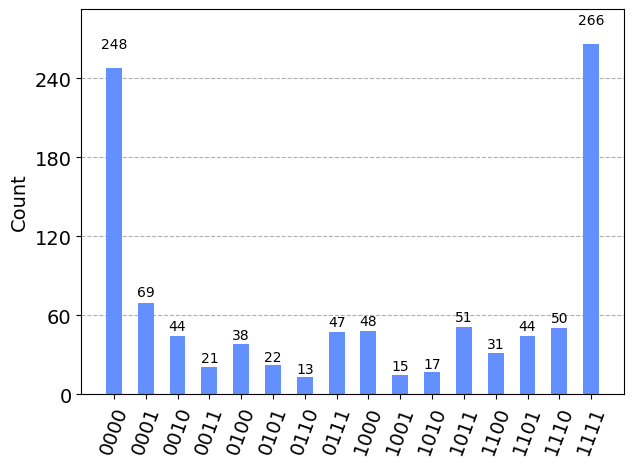

In [ ]:

# Create noisy simulator backend
sim_noise = AerSimulator(noise_model=noise_bit_flip)

# Transpile circuit for noisy basis gates
circ_tnoise = transpile(circ, sim_noise)

# Run and get counts
result_bit_flip = sim_noise.run(circ_tnoise).result()
counts_bit_flip = result_bit_flip.get_counts(0)

# Plot noisy output
plot_histogram(counts_bit_flip)

#### 出典
以下からコードを取得：https://qiskit.org/documentation/locale/ja_JP/tutorials/simulators/3_building_noise_models.html

## Q30 ノイズモデル(2)
Q24の回路に対してT1/T2 熱緩和モデルを適用し、ノイズがある場合の振る舞いを確認せよ。

### A30

In [ ]:
# T1 and T2 values for qubits 0-3
T1s = np.random.normal(50e3, 10e3, 4) # Sampled from normal distribution mean 50 microsec
T2s = np.random.normal(70e3, 10e3, 4)  # Sampled from normal distribution mean 50 microsec

# Truncate random T2s <= T1s
T2s = np.array([min(T2s[j], 2 * T1s[j]) for j in range(4)])

# Instruction times (in nanoseconds)
time_u1 = 0   # virtual gate
time_u2 = 50  # (single X90 pulse)
time_u3 = 100 # (two X90 pulses)
time_cx = 300
time_reset = 1000  # 1 microsecond
time_measure = 1000 # 1 microsecond

# QuantumError objects
errors_reset = [thermal_relaxation_error(t1, t2, time_reset)
                for t1, t2 in zip(T1s, T2s)]
errors_measure = [thermal_relaxation_error(t1, t2, time_measure)
                  for t1, t2 in zip(T1s, T2s)]
errors_u1  = [thermal_relaxation_error(t1, t2, time_u1)
              for t1, t2 in zip(T1s, T2s)]
errors_u2  = [thermal_relaxation_error(t1, t2, time_u2)
              for t1, t2 in zip(T1s, T2s)]
errors_u3  = [thermal_relaxation_error(t1, t2, time_u3)
              for t1, t2 in zip(T1s, T2s)]
errors_cx = [[thermal_relaxation_error(t1a, t2a, time_cx).expand(
             thermal_relaxation_error(t1b, t2b, time_cx))
              for t1a, t2a in zip(T1s, T2s)]
               for t1b, t2b in zip(T1s, T2s)]

# Add errors to noise model
noise_thermal = NoiseModel()
for j in range(4):
    noise_thermal.add_quantum_error(errors_reset[j], "reset", [j])
    noise_thermal.add_quantum_error(errors_measure[j], "measure", [j])
    noise_thermal.add_quantum_error(errors_u1[j], "u1", [j])
    noise_thermal.add_quantum_error(errors_u2[j], "u2", [j])
    noise_thermal.add_quantum_error(errors_u3[j], "u3", [j])
    for k in range(4):
        noise_thermal.add_quantum_error(errors_cx[j][k], "cx", [j, k])

print(noise_thermal)

NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx', 'u2', 'u3']
  Instructions with noise: ['measure', 'reset', 'u2', 'cx', 'u3']
  Qubits with noise: [0, 1, 2, 3]
  Specific qubit errors: [('reset', (0,)), ('reset', (1,)), ('reset', (2,)), ('reset', (3,)), ('measure', (0,)), ('measure', (1,)), ('measure', (2,)), ('measure', (3,)), ('u2', (0,)), ('u2', (1,)), ('u2', (2,)), ('u2', (3,)), ('u3', (0,)), ('u3', (1,)), ('u3', (2,)), ('u3', (3,)), ('cx', (0, 0)), ('cx', (0, 1)), ('cx', (0, 2)), ('cx', (0, 3)), ('cx', (1, 0)), ('cx', (1, 1)), ('cx', (1, 2)), ('cx', (1, 3)), ('cx', (2, 0)), ('cx', (2, 1)), ('cx', (2, 2)), ('cx', (2, 3)), ('cx', (3, 0)), ('cx', (3, 1)), ('cx', (3, 2)), ('cx', (3, 3))]


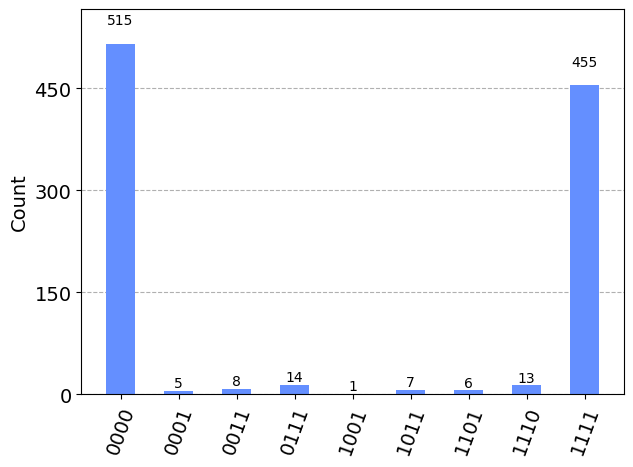

In [ ]:
# Run the noisy simulation
sim_thermal = AerSimulator(noise_model=noise_thermal)

# Transpile circuit for noisy basis gates
circ_tthermal = transpile(circ, sim_thermal)

# Run and get counts
result_thermal = sim_thermal.run(circ_tthermal).result()
counts_thermal = result_thermal.get_counts(0)

# Plot noisy output
plot_histogram(counts_thermal)

#### 出典
以下からコードを取得：https://qiskit.org/documentation/locale/ja_JP/tutorials/simulators/3_building_noise_models.html

## Q31 量子状態の可視化(1)
ブロッホ球で|0>を描画せよ。

### A31

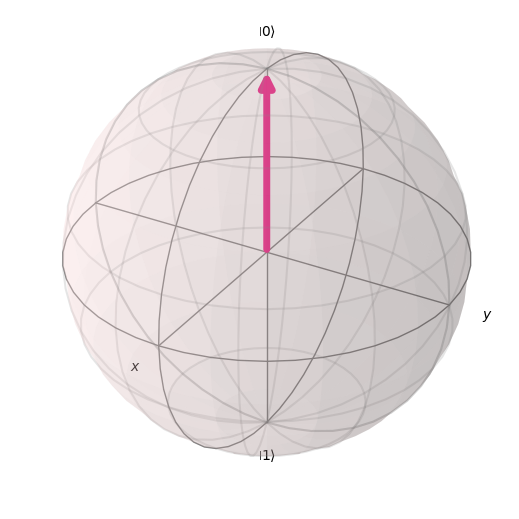

In [ ]:
from qiskit.visualization import plot_bloch_vector
plot_bloch_vector([0,0,1]) # 第1引数から順にX軸, Y軸, Z軸

## Q32 量子状態の可視化(２)
Bell状態をブロッホ球で表せ。

### A32

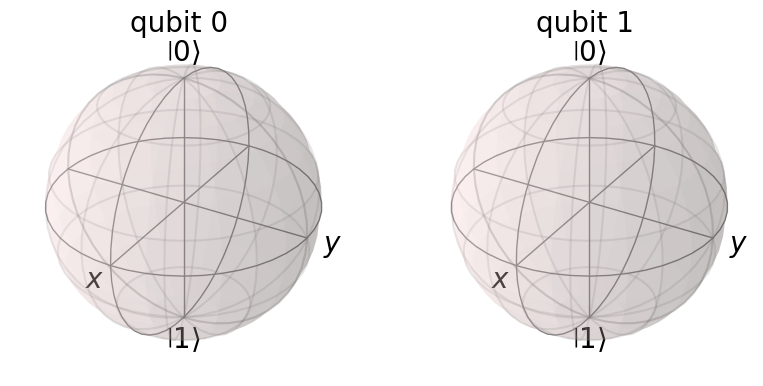

In [ ]:
# execute the quantum circuit
backend = BasicAer.get_backend('statevector_simulator') # the device to run on
result = execute(bell, backend).result()
psi  = result.get_statevector(bell)
plot_bloch_multivector(psi)

#### 出典
以下からコードを取得：https://qiskit.org/documentation/stable/0.24/locale/ja_JP/tutorials/circuits/2_plotting_data_in_qiskit.html

## Q33 量子状態の可視化(３)
Bell状態をqsphereで表し、ブロッホ球と比べてどのような利点があるか述べよ。

### A33

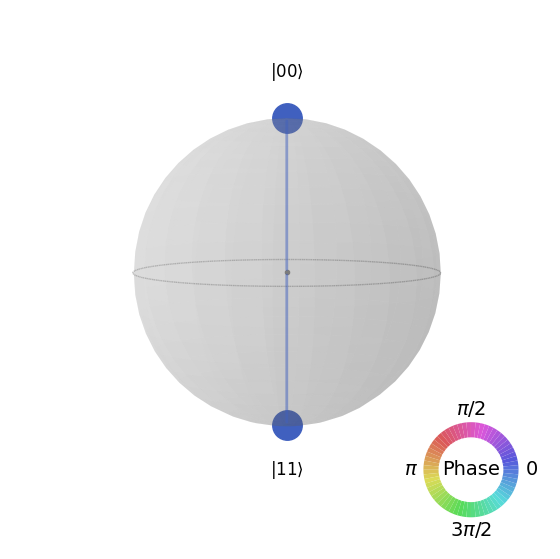

In [ ]:
plot_state_qsphere(psi)

- エンタングルしていることが可視化される
- 位相も表示される

#### 出典
以下からコードを取得：https://qiskit.org/documentation/stable/0.24/locale/ja_JP/tutorials/circuits/2_plotting_data_in_qiskit.html

## Q34
$|111\rangle$状態を増幅する3量子ビットのグローバー探索アルゴリズムを実装せよ。

### A34

{'000': 30, '010': 32, '100': 34, '001': 36, '110': 35, '111': 803, '011': 25, '101': 29}


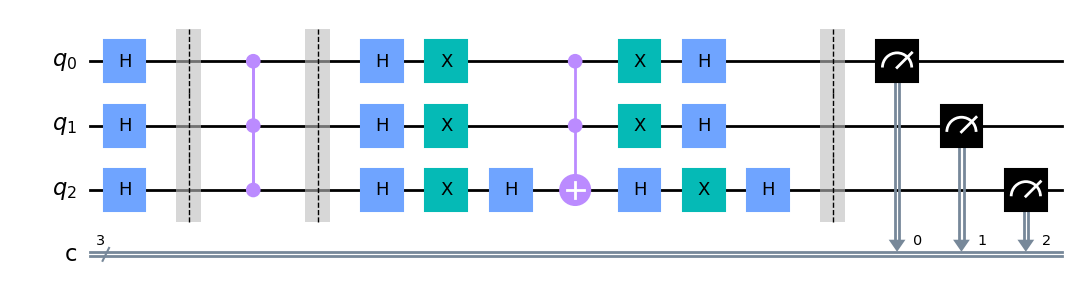

In [ ]:
def oracle(circ):
    # 探索対象の状態にマーキングをするオラクル回路
    circ.ccz(0, 1, 2)

def inversion_about_average(circ):
    # 平均を中心に反転する回路
    circ.h([0, 1, 2])
    circ.x([0, 1, 2])
    circ.h(2)
    circ.ccx(0,1,2)
    circ.h(2)
    circ.x([0, 1, 2])
    circ.h([0, 1, 2])

# 3量子ビットの回路の作成
circ = QuantumCircuit(3, 3)
circ.h([0, 1, 2])
circ.barrier()

# グローバー探索アルゴリズムの実行
oracle(circ)
circ.barrier()
inversion_about_average(circ)
circ.barrier()

# 測定
circ.measure([0, 1, 2], [0, 1, 2])

# シミュレーション実行
simulator = Aer.get_backend('qasm_simulator')
job = execute(circ, simulator, shots=1024)
result = job.result()
counts = result.get_counts(circ)

print(counts)


circ.draw("mpl")

## Q35
 量子ビットを使ったランダムウォークをシミュレートするプログラムを作成せよ。初期状態は|0⟩とし、コインフリップをシミュレートするためにアダマールゲートを使用せよ。指定されたステップ数だけランダムウォークを進め、最終的な確率分布を出力するところまで行え。

### A35

{'1': 489, '0': 535}


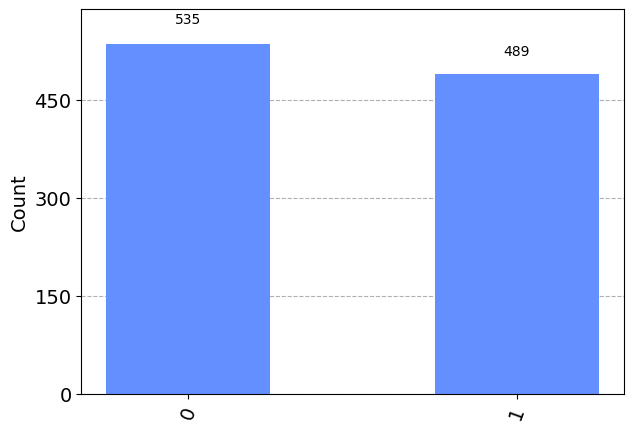

In [ ]:
def quantum_coin_flip(circuit, qubit_index):
    circuit.h(qubit_index)  # アダマールゲートを適用してコインフリップをシミュレート

# パラメータの設定
num_steps = 10  # ランダムウォークのステップ数
qubit_index = 0  # 使用する量子ビットのインデックス

# 量子回路を作成
qc = QuantumCircuit(1, 1)  # 1量子ビットと1古典ビットを持つ回路

# 初期状態 |0⟩
qc.initialize([1, 0], qubit_index)

# ランダムウォークを進める
for step in range(num_steps):
    quantum_coin_flip(qc, qubit_index)
    qc.measure(qubit_index, qubit_index)
    qc.x(qubit_index).c_if(qubit_index, 1)  # 量子ビットが|1⟩の場合に反転

# バックエンドを選択してシミュレーション実行
simulator = Aer.get_backend('aer_simulator')
compiled_circuit = transpile(qc, simulator)
result = simulator.run(compiled_circuit).result()

# 確率分布を出力
counts = result.get_counts()
print(counts)

# 確率分布をヒストグラムとして表示
plot_histogram(counts)




このプログラムは、初期状態を|0⟩とし、アダマールゲートを使用してコインフリップをシミュレートしながらランダムウォークを進めます。各ステップで量子ビットの状態を測定し、特定の条件で反転させます。最終的な確率分布を出力し、ヒストグラムとして表示します。必要に応じて、ステップ数やショット数などを調整してカスタマイズできます


## Q36 Quadratic Program
QuadraticProgramクラスを用いて、次の最適化問題を構築しなさい。

maximize $x - 2y$

$x, y \in \lbrace 0, 1\rbrace$


### A36

In [ ]:
from qiskit_optimization import QuadraticProgram

problem = QuadraticProgram("sample")
problem.binary_var("x")
problem.binary_var("y")
problem.maximize(linear={"x": 1, "y": -2})
#problem.binary_var("x")
#problem.integer_var(-1, 5, "y")
#problem.integer_var(-1, 5, "z")
#problem.minimize(constant=3, linear={"x": 1}, quadratic={("x", "y"): 2, ("z", "z"): -1})
print(problem.prettyprint())



Problem name: sample

Maximize
  x - 2*y

Subject to
  No constraints

  Binary variables (2)
    x y



このプログラムでは、QuadraticProgramクラスのオブジェクトを用意し、決定変数として $x$, $y$ を用意し、それらを用いた式 $x - 2y$ を最大化する目的関数を設定しています。

#### 出典
以下からコードを取得：https://qiskit.org/ecosystem/optimization/locale/ja_JP/migration/01_migration_guide_to_v0.5.html

## Q37 MinimumEigenOptimizer (1)
Q36で構築した最適化問題を、MinimumEigenOptimizerを使用して解きなさい。ソルバーにはNumPyMinimumEigensolverを使用しなさい。

### A37

In [ ]:
mes = NumPyMinimumEigensolver()
meo = MinimumEigenOptimizer(min_eigen_solver=mes)
result = meo.solve(problem)
print(result)

fval=-23.0, x=1.0, y=-1.0, z=5.0, status=SUCCESS


このプログラムでは、ソルバーとしてNumPyMinimumEigensolverのオブジェクトを用意し、このソルバーを指定したMinimumEigenOpimizerのオブジェクトを作成して、最適化問題を解いています。

#### 出典
以下からコードを取得：https://qiskit.org/ecosystem/optimization/locale/ja_JP/migration/01_migration_guide_to_v0.5.html

## Q38 MinimumEigenOptimizer(2)
Q36で構築した最適化問題を、Q2と同様にMinimumEigenOptimizerを使用して解きなさい。今回はソルバーとしてQAOAを使用しなさい。

### A38

In [ ]:

shots = 1000
mes = QAOA(sampler=Sampler(), optimizer=COBYLA())
meo = MinimumEigenOptimizer(min_eigen_solver=mes)
result = meo.solve(problem)
print(result)

fval=-23.0, x=1.0, y=-1.0, z=5.0, status=SUCCESS


このプログラムでは、ソルバーとしてQAOAのオブジェクトを用意し、このソルバーを指定したMinimumEigenOpimizerのオブジェクトを作成して、最適化問題を解いています。

#### 出典
以下からコードを取得：https://qiskit.org/ecosystem/optimization/locale/ja_JP/migration/01_migration_guide_to_v0.5.html

## Q39 MinimumEigenOptimizer
Q36で構築した最適化問題を、Q2, Q3と同様にMinimumEigenOptimizerを使用して解きなさい。今回はソルバーとしてSamplingVQEを使用しなさい。

### A39

In [ ]:

mes = SamplingVQE(sampler=Sampler(), ansatz=RealAmplitudes(), optimizer=COBYLA())
meo = MinimumEigenOptimizer(min_eigen_solver=mes)
result = meo.solve(problem)
print(result)



fval=-23.0, x=1.0, y=-1.0, z=5.0, status=SUCCESS


#### 出典
以下からコードを取得：https://qiskit.org/ecosystem/optimization/locale/ja_JP/migration/01_migration_guide_to_v0.5.html

## Q40 WarmStartQAOAOptimizer
Q36で構築した最適化問題を、こんどはWarmStartQAOAOptimizerを使用して解きなさい。ソルバーとしてはSlsqpOptimizerを使用しなさい。

### A40

In [ ]:

qaoa = QAOA(sampler=Sampler(), optimizer=COBYLA())
optimizer = WarmStartQAOAOptimizer(
    pre_solver=SlsqpOptimizer(), relax_for_pre_solver=True, qaoa=qaoa, epsilon=0.25
)
result = optimizer.solve(problem)
print(result)



fval=-22.0, x=0.0, y=-1.0, z=5.0, status=SUCCESS


#### 出典
以下からコードを取得：https://qiskit.org/ecosystem/optimization/locale/ja_JP/migration/01_migration_guide_to_v0.5.html

## Q41 GroverOptimizer
Q36で構築した最適化問題を、こんどはGroverOptimizerを使用して解きなさい。Samplerを使用しなさい。

### A41

In [ ]:

optimizer = GroverOptimizer(num_value_qubits=3, num_iterations=3, sampler=Sampler())
result = optimizer.solve(problem)
print(result)

fval=3.0, x=0.0, y=2.0, z=0.0, status=SUCCESS


#### 出典
以下からコードを取得：https://qiskit.org/ecosystem/optimization/locale/ja_JP/migration/01_migration_guide_to_v0.5.html

## Q42 巡回セールスマン問題(1)
networkxを用いて3つの地点のグラフを作成せよ。 各ルートには距離の重みづけをランダムに設定せよ。

### A42

distance
 [[ 0. 48. 91.]
 [48.  0. 63.]
 [91. 63.  0.]]


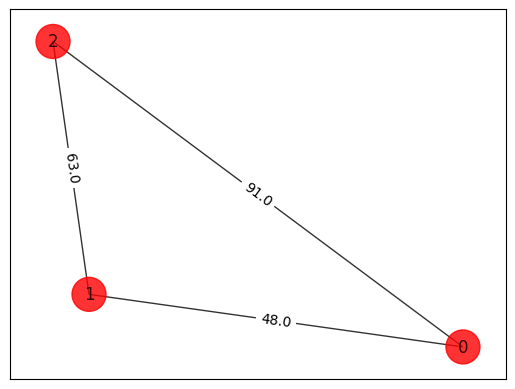

In [ ]:
# Generating a graph of 3 nodes
n = 3
num_qubits = n**2
tsp = Tsp.create_random_instance(n, seed=123)
adj_matrix = nx.to_numpy_array(tsp.graph)
print("distance\n", adj_matrix)

colors = ["r" for node in tsp.graph.nodes]
pos = [tsp.graph.nodes[node]["pos"] for node in tsp.graph.nodes]
draw_graph(tsp.graph, colors, pos)

## Q43 巡回セールスマン問題(2)
Q42をburte force(総当たり)で解きなさい。

### A43

order = (0, 1, 2) Distance = 202.0
Best order from brute force = (0, 1, 2) with total distance = 202.0


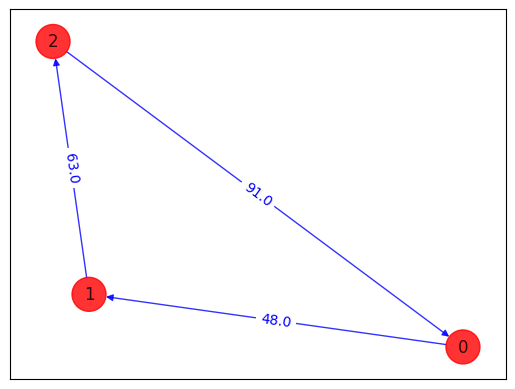

In [ ]:
def brute_force_tsp(w, N):
    a = list(permutations(range(1, N)))
    last_best_distance = 1e10
    for i in a:
        distance = 0
        pre_j = 0
        for j in i:
            distance = distance + w[j, pre_j]
            pre_j = j
        distance = distance + w[pre_j, 0]
        order = (0,) + i
        if distance < last_best_distance:
            best_order = order
            last_best_distance = distance
            print("order = " + str(order) + " Distance = " + str(distance))
    return last_best_distance, best_order


best_distance, best_order = brute_force_tsp(adj_matrix, n)
print(
    "Best order from brute force = "
    + str(best_order)
    + " with total distance = "
    + str(best_distance)
)


def draw_tsp_solution(G, order, colors, pos):
    G2 = nx.DiGraph()
    G2.add_nodes_from(G)
    n = len(order)
    for i in range(n):
        j = (i + 1) % n
        G2.add_edge(order[i], order[j], weight=G[order[i]][order[j]]["weight"])
    default_axes = plt.axes(frameon=True)
    nx.draw_networkx(
        G2, node_color=colors, edge_color="b", node_size=600, alpha=0.8, ax=default_axes, pos=pos
    )
    edge_labels = nx.get_edge_attributes(G2, "weight")
    nx.draw_networkx_edge_labels(G2, pos, font_color="b", edge_labels=edge_labels)


draw_tsp_solution(tsp.graph, best_order, colors, pos)

## Q44 巡回セールスマン問題(3)
Q42を2次制約問題で表わしなさい

### A44

In [ ]:
qp = tsp.to_quadratic_program()
print(qp.prettyprint())

Problem name: TSP

Minimize
  48*x_0_0*x_1_1 + 48*x_0_0*x_1_2 + 91*x_0_0*x_2_1 + 91*x_0_0*x_2_2
  + 48*x_0_1*x_1_0 + 48*x_0_1*x_1_2 + 91*x_0_1*x_2_0 + 91*x_0_1*x_2_2
  + 48*x_0_2*x_1_0 + 48*x_0_2*x_1_1 + 91*x_0_2*x_2_0 + 91*x_0_2*x_2_1
  + 63*x_1_0*x_2_1 + 63*x_1_0*x_2_2 + 63*x_1_1*x_2_0 + 63*x_1_1*x_2_2
  + 63*x_1_2*x_2_0 + 63*x_1_2*x_2_1

Subject to
  Linear constraints (6)
    x_0_0 + x_0_1 + x_0_2 == 1  'c0'
    x_1_0 + x_1_1 + x_1_2 == 1  'c1'
    x_2_0 + x_2_1 + x_2_2 == 1  'c2'
    x_0_0 + x_1_0 + x_2_0 == 1  'c3'
    x_0_1 + x_1_1 + x_2_1 == 1  'c4'
    x_0_2 + x_1_2 + x_2_2 == 1  'c5'

  Binary variables (9)
    x_0_0 x_0_1 x_0_2 x_1_0 x_1_1 x_1_2 x_2_0 x_2_1 x_2_2



## Q45 巡回セールスマン問題(4)
Q44の結果を2次式をquboで表わしなさい。

### A45

In [ ]:

qp2qubo = QuadraticProgramToQubo()
qubo = qp2qubo.convert(qp)
qubitOp, offset = qubo.to_ising()
print("Offset:", offset)
print("Ising Hamiltonian:")
print(str(qubitOp))

Offset: 7581.0
Ising Hamiltonian:
-1282.5 * IIIIIIIIZ
- 1282.5 * IIIIIIIZI
- 1282.5 * IIIIIIZII
- 1268.5 * IIIIIZIII
- 1268.5 * IIIIZIIII
- 1268.5 * IIIZIIIII
- 1290.0 * IIZIIIIII
- 1290.0 * IZIIIIIII
- 1290.0 * ZIIIIIIII
+ 606.5 * IIIIIIIZZ
+ 606.5 * IIIIIIZIZ
+ 606.5 * IIIIIIZZI
+ 606.5 * IIIIIZIIZ
+ 12.0 * IIIIIZIZI
+ 12.0 * IIIIIZZII
+ 12.0 * IIIIZIIIZ
+ 606.5 * IIIIZIIZI
+ 12.0 * IIIIZIZII
+ 606.5 * IIIIZZIII
+ 12.0 * IIIZIIIIZ
+ 12.0 * IIIZIIIZI
+ 606.5 * IIIZIIZII
+ 606.5 * IIIZIZIII
+ 606.5 * IIIZZIIII
+ 606.5 * IIZIIIIIZ
+ 22.75 * IIZIIIIZI
+ 22.75 * IIZIIIZII
+ 606.5 * IIZIIZIII
+ 15.75 * IIZIZIIII
+ 15.75 * IIZZIIIII
+ 22.75 * IZIIIIIIZ
+ 606.5 * IZIIIIIZI
+ 22.75 * IZIIIIZII
+ 15.75 * IZIIIZIII
+ 606.5 * IZIIZIIII
+ 15.75 * IZIZIIIII
+ 606.5 * IZZIIIIII
+ 22.75 * ZIIIIIIIZ
+ 22.75 * ZIIIIIIZI
+ 606.5 * ZIIIIIZII
+ 15.75 * ZIIIIZIII
+ 15.75 * ZIIIZIIII
+ 606.5 * ZIIZIIIII
+ 606.5 * ZIZIIIIII
+ 606.5 * ZZIIIIIII


## Q46 巡回セールスマン問題(5)
Q45をExactSolverで実行しなさい。

### A46

In [ ]:
result = exact.solve(qubo)
print(result.prettyprint())

objective function value: 202.0
variable values: x_0_0=1.0, x_0_1=0.0, x_0_2=0.0, x_1_0=0.0, x_1_1=1.0, x_1_2=0.0, x_2_0=0.0, x_2_1=0.0, x_2_2=1.0
status: SUCCESS


## Q47 巡回セールスマン問題(6)
Q46が正しいコストが与えられているか確認しなさい。

### A47

energy: -7379.0
tsp objective: 202.0
feasible: True
solution: [0, 1, 2]
solution objective: 202.0


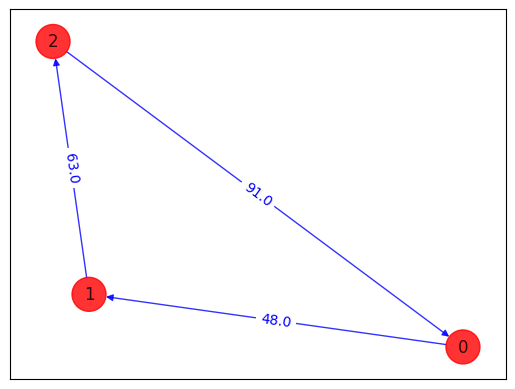

In [ ]:
# Making the Hamiltonian in its full form and getting the lowest eigenvalue and eigenvector
ee = NumPyMinimumEigensolver()
result = ee.compute_minimum_eigenvalue(qubitOp)

print("energy:", result.eigenvalue.real)
print("tsp objective:", result.eigenvalue.real + offset)
x = tsp.sample_most_likely(result.eigenstate)
print("feasible:", qubo.is_feasible(x))
z = tsp.interpret(x)
print("solution:", z)
print("solution objective:", tsp.tsp_value(z, adj_matrix))
draw_tsp_solution(tsp.graph, z, colors, pos)

## Q48 巡回セールスマン問題(7)
Q45を量子コンピュータ(シミュレータ)で実行しなさい

In [ ]:
algorithm_globals.random_seed = 123
seed = 10598

### A48

energy: -2802.03701418958
time: 0.9956471920013428
feasible: True
solution: [1, 2, 0]
solution objective: 202.0


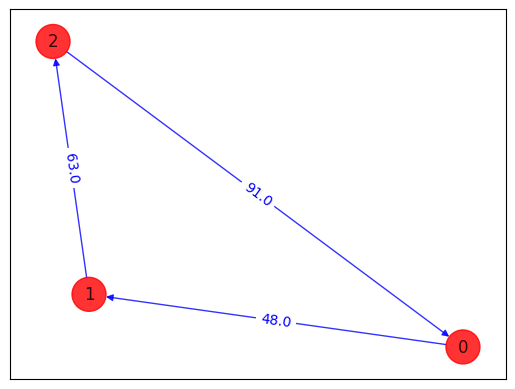

In [ ]:
optimizer = SPSA(maxiter=10)
ry = TwoLocal(qubitOp.num_qubits, "ry", "cz", reps=5, entanglement="linear")
vqe = SamplingVQE(sampler=Sampler(), ansatz=ry, optimizer=optimizer)

result = vqe.compute_minimum_eigenvalue(qubitOp)

print("energy:", result.eigenvalue.real)
print("time:", result.optimizer_time)
x = tsp.sample_most_likely(result.eigenstate)
print("feasible:", qubo.is_feasible(x))
z = tsp.interpret(x)
print("solution:", z)
print("solution objective:", tsp.tsp_value(z, adj_matrix))
draw_tsp_solution(tsp.graph, z, colors, pos)

##### 別解

In [ ]:
algorithm_globals.random_seed = 123
seed = 10598

objective function value: 202.0
variable values: x_0_0=0.0, x_0_1=0.0, x_0_2=1.0, x_1_0=0.0, x_1_1=1.0, x_1_2=0.0, x_2_0=1.0, x_2_1=0.0, x_2_2=0.0
status: SUCCESS
solution: [1, 2, 0]
solution objective: 202.0


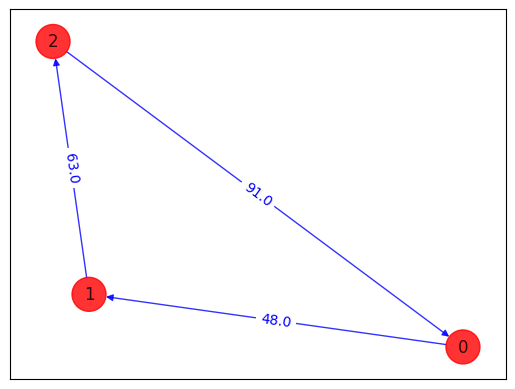

In [ ]:
# create minimum eigen optimizer based on SamplingVQE
vqe_optimizer = MinimumEigenOptimizer(vqe)

# solve quadratic program
result = vqe_optimizer.solve(qp)
print(result.prettyprint())

z = tsp.interpret(x)
print("solution:", z)
print("solution objective:", tsp.tsp_value(z, adj_matrix))
draw_tsp_solution(tsp.graph, z, colors, pos)